In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
# import geoplot
import fiona
import json

import math
np.set_printoptions(threshold=np.inf)

from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, learning_curve, KFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
# from prettytable import PrettyTable
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
# from yellowbrick.datasets import load_occupancy
# from yellowbrick.model_selection import FeatureImportances

Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


In [2]:
car_df = pd.read_pickle('car_df.pkl')
credit_df = pd.read_pickle('credit_df.pkl')
loyalty_df = pd.read_pickle('loyalty_df.pkl')
gps_df = pd.read_pickle('gps_df.pkl')

(685169, 8)

In [4]:
gps_df['fullName'] = gps_df['FirstName'] + " " + gps_df['LastName']
gps_df['Date'] = gps_df['Timestamp'].map(lambda x: x.date())
gps_df.sort_values(by=['Timestamp', 'CarID'], inplace=True)
gps_df.head()

Timestamp  CarID        lat       long    LastName FirstName  \
0 2014-01-06 06:28:01   35.0  36.076225  24.874689  Vasco-Pais    Willem   
1 2014-01-06 06:28:01   35.0  36.076220  24.874596  Vasco-Pais    Willem   
2 2014-01-06 06:28:03   35.0  36.076211  24.874443  Vasco-Pais    Willem   
3 2014-01-06 06:28:05   35.0  36.076217  24.874253  Vasco-Pais    Willem   
4 2014-01-06 06:28:06   35.0  36.076214  24.874167  Vasco-Pais    Willem   

  CurrentEmploymentType        CurrentEmploymentTitle           fullName  \
0             Executive  Environmental Safety Advisor  Willem Vasco-Pais   
1             Executive  Environmental Safety Advisor  Willem Vasco-Pais   
2             Executive  Environmental Safety Advisor  Willem Vasco-Pais   
3             Executive  Environmental Safety Advisor  Willem Vasco-Pais   
4             Executive  Environmental Safety Advisor  Willem Vasco-Pais   

         Date  
0  2014-01-06  
1  2014-01-06  
2  2014-01-06  
3  2014-01-06  
4  2014-01-06

In [7]:
abila = fiona.open('Geospatial/Abila.shp')

abila_df = pd.DataFrame(list(abila))

abila_df['singles'] = abila_df['geometry'].apply(lambda x: True if len(x['coordinates']) == 1 else False)
abila_df['singles'].value_counts()
abila_geo = abila_df[abila_df['singles'] == False]
abila_geo.drop(columns=['singles'], inplace=True)
# abila_geo['geometry'] = abila_geo['geometry'].apply(lambda x: {'type': x['type'], 'coordinates': [(x['coordinates'][0][1], x['coordinates'][0][0]), (x['coordinates'][1][1], x['coordinates'][1][0])]})
# abila_geo.columns

abila_json = json.loads(abila_geo.to_json(orient='records'))
abila_gdf = gpd.GeoDataFrame.from_features(abila_json)

img = plt.imread('map-tourist.jpg')

ERROR 1: PROJ: proj_identify: /Users/ajoseph/opt/anaconda3/envs/TheLastMelon/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


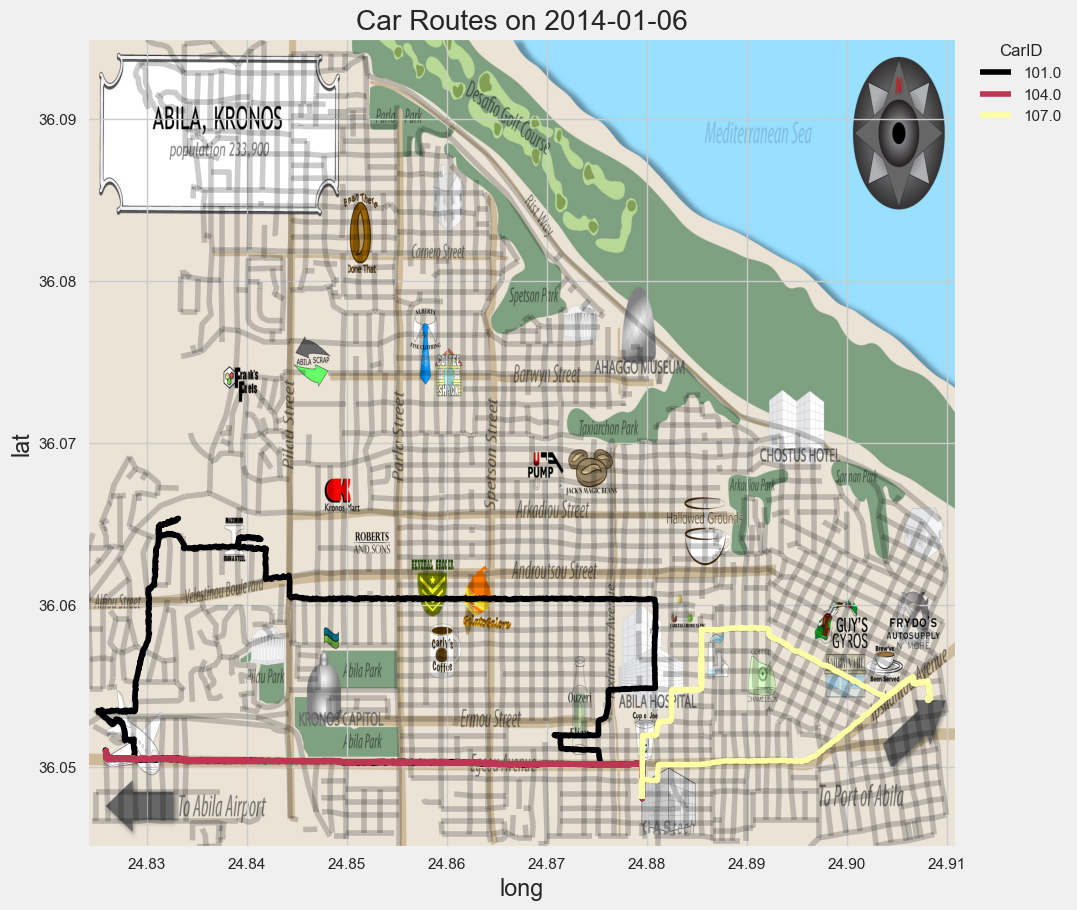

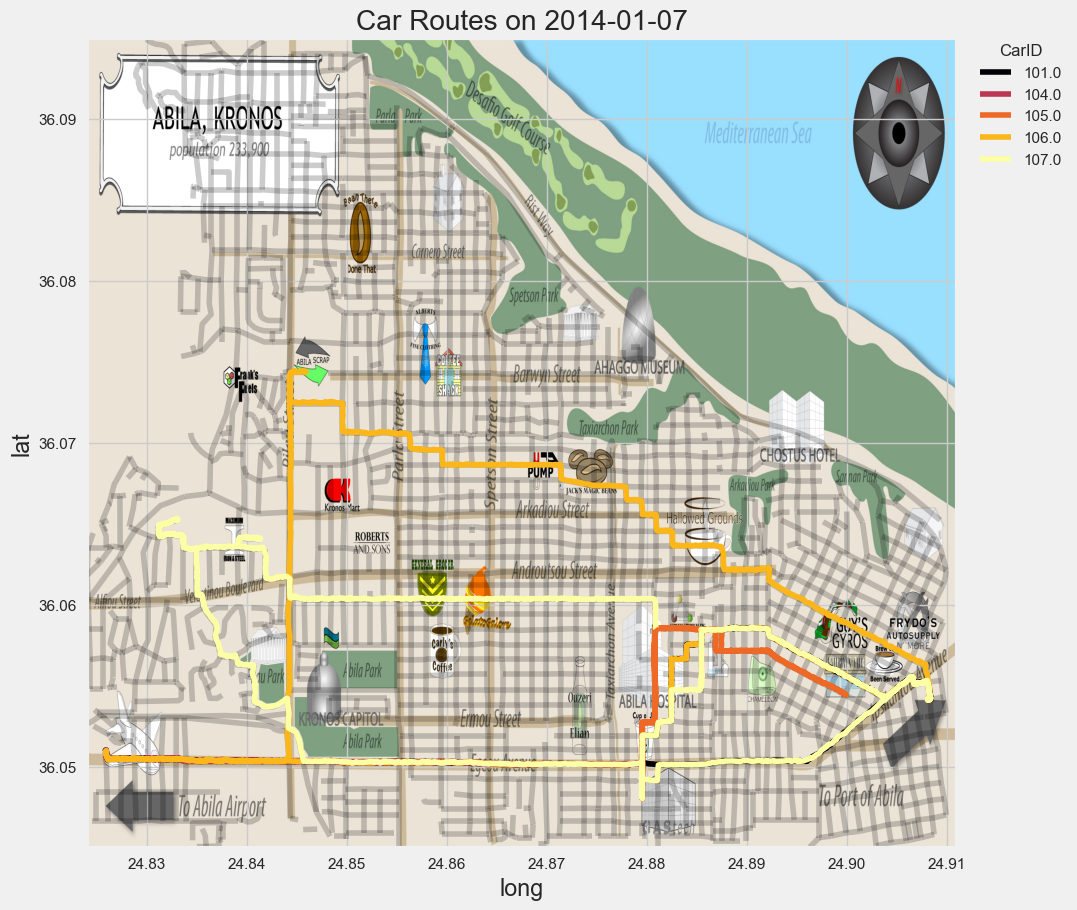

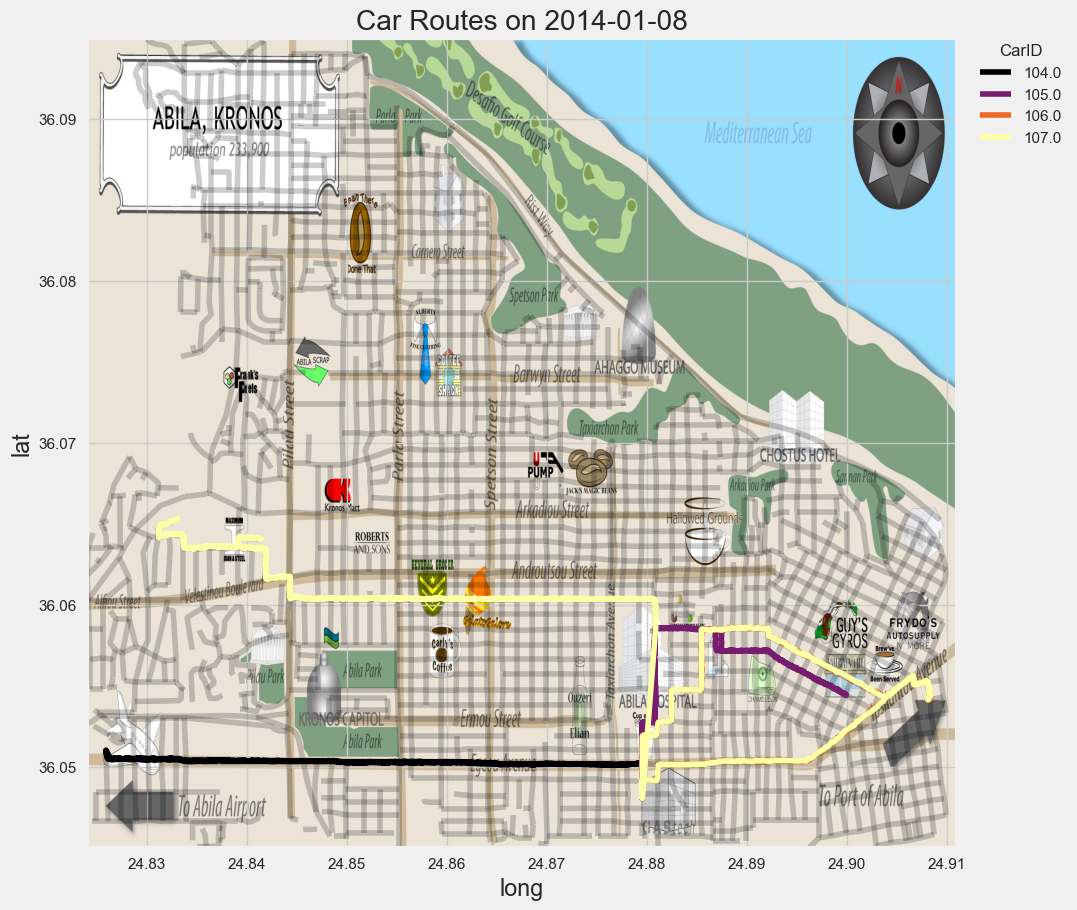

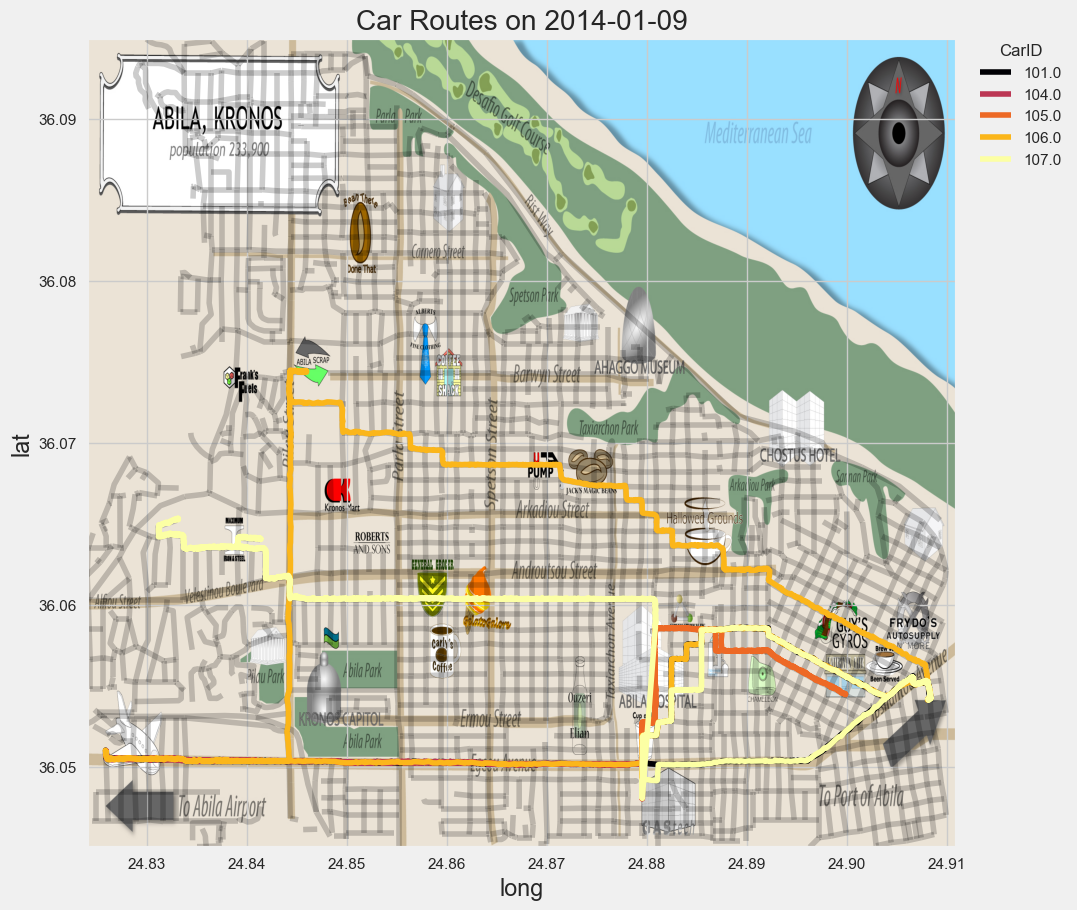

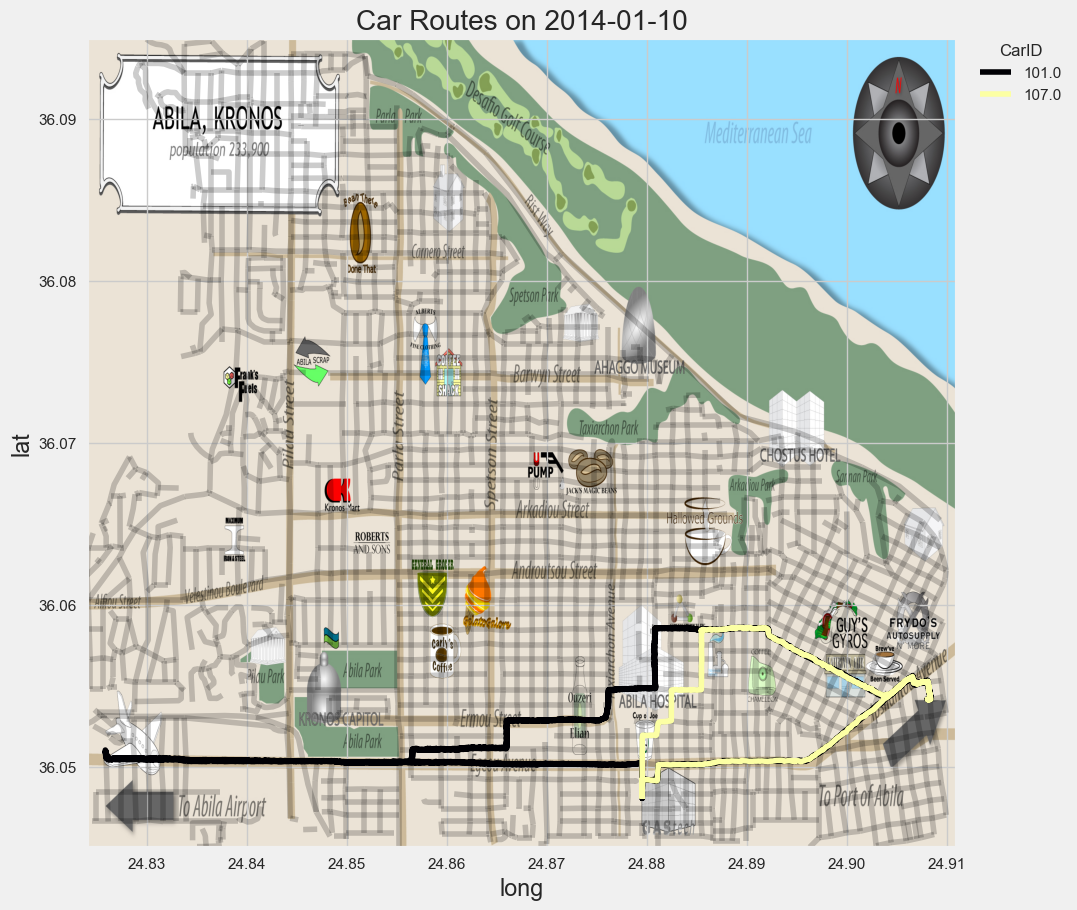

KeyboardInterrupt: 

In [8]:
unmarked = gps_df[gps_df['FirstName'].isna()]
unmarked.sort_values(by='Timestamp', inplace=True)
dates = unmarked['Date'].unique()
for i in range(len(dates)):
    ax = abila_gdf.plot(alpha=0.2, color='black', figsize=(10,10))
    ax.imshow(img, extent=[24.824, 24.911, 36.045, 36.095], aspect='auto')
    sns.lineplot(x=unmarked[unmarked['Date'] == pd.to_datetime(dates[i])]['long'], y=unmarked[unmarked['Date'] == pd.to_datetime(dates[i])]['lat'], hue=unmarked[unmarked['Date'] == pd.to_datetime(dates[i])]['CarID'], palette='inferno', sort=False, ax=ax)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='CarID')
    plt.title("Car Routes on " + str(dates[i]))
    plt.show()

In [4]:
# abila = fiona.open('Geospatial/Abila.shp')

# abila_df = pd.DataFrame(list(abila))

# abila_df['singles'] = abila_df['geometry'].apply(lambda x: True if len(x['coordinates']) == 1 else False)
# abila_df['singles'].value_counts()
# abila_geo = abila_df[abila_df['singles'] == False]
# abila_geo.drop(columns=['singles'], inplace=True)
# abila_geo.columns

# abila_json = json.loads(abila_geo.to_json(orient='records'))
# abila_gdf = gpd.GeoDataFrame.from_features(abila_json)

# # Get the order of the fields in the Fiona Collection; add geometry to the end
# columns = list(abila.meta["schema"]["properties"]) + ["geometry"]
# # Re-order columns in the correct order
# gdf2 = abila_gdf[columns]
# print(gdf2.columns)

Index(['TLID', 'FEDIRP', 'FENAME', 'FETYPE', 'FEDIRS', 'FRADDL', 'TOADDL',
       'FRADDR', 'TOADDR', 'geometry'],
      dtype='object')


In [5]:
abila_gdf.head()

geometry       TLID FEDIRP  \
0  LINESTRING (24.84149 36.07051, 24.84156 36.07042)  184632270      N   
1  LINESTRING (24.84748 36.04809, 24.84837 36.04807)  184632283      S   
2  LINESTRING (24.84156 36.07042, 24.84196 36.07072)  184632377      N   
3  LINESTRING (24.84747 36.04913, 24.84742 36.04913)  184633316   None   
4  LINESTRING (24.84428 36.07631, 24.84436 36.07622)  184633423      N   

     FENAME FETYPE FEDIRS  FRADDL  TOADDL  FRADDR  TOADDR  
0  Hallanol     Dr   None     NaN     NaN     NaN     NaN  
1     Ermou     St   None     NaN     NaN     NaN     NaN  
2  Handstil     Pl   None     NaN     NaN     NaN     NaN  
3      None   None   None     NaN     NaN     NaN     NaN  
4     Pilau     St   None  3699.0  3097.0     NaN     NaN

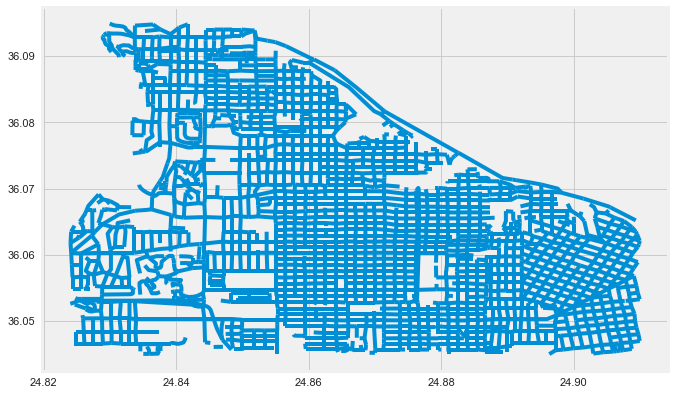

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
abila_gdf.plot(ax=ax)
plt.show()

In [51]:
kronos = fiona.open('Geospatial/Kronos_Island.shp')

kronos_df = pd.DataFrame(list(kronos))

kronos_json = json.loads(kronos_df.to_json(orient='records'))
kronos_gdf = gpd.GeoDataFrame.from_features(kronos_json)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        1 non-null      object
 1   id          1 non-null      object
 2   properties  1 non-null      object
 3   geometry    1 non-null      object
dtypes: object(4)
memory usage: 160.0+ bytes


<AxesSubplot:>

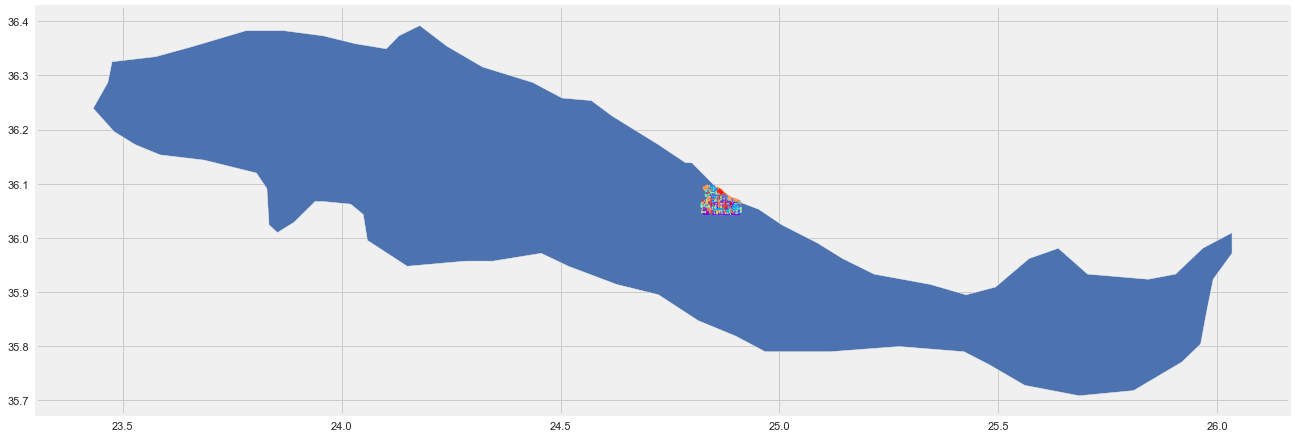

In [94]:
fig, ax = plt.subplots(figsize= (20,20))
abila_gdf.plot(ax=ax, cmap = 'rainbow', column = 'FENAME')
kronos_g.plot(ax=ax)

In [8]:
abila_in_kronos = gpd.overlay(abila_gdf, kronos_g, how = 'intersection')
abila_in_kronos.plot(figsize= (20,15), cmap = 'prism', column = 'FENAME')

NameError: name 'kronos_g' is not defined